#### ABOUT
The dataset provided below has been scrapped from 'www.indeed.in' and it contains information about the various Data Analyst posts provided by various companies across India. 
So, first we will clean the dataset that is available and then perform some analysis using it.

#### 1. IMPORT THE RELEVANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### 2. LOAD THE DATASET

In [3]:
data=pd.read_csv('Indeed_Project.csv')
data

,Unnamed: 0,Link,Title,Comapny,Location,Salary,Rating,Posting_Date
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://in.indeed.com//company/ARDEM-Data-Serv...,Medical Data Analyst\nnew,"['ARDEM', 'Data', 'Services', 'Private', 'Limi...",['Remote'],"['₹13,000', '-', '₹15,000', 'a', 'month']",NaN,Just posted
2,2,https://in.indeed.com//rc/clk?jk=2f484ec7f01ca...,Data Analyst\nnew,"['Cognizant', '-', 'HQ']","['Hyderabad,', 'Telangana']",NaN,NaN,2 days ago
3,3,https://in.indeed.com//rc/clk?jk=da3d5ba105be4...,Data Analyst\nnew,"['Clarivate', 'Analytics']","['Bengaluru,', 'Karnataka']",NaN,['3.5'],Today
4,4,https://in.indeed.com//rc/clk?jk=cb6a718607430...,"Data Analyst I, FinTech\nnew",['Uber'],"['Hyderabad,', 'Telangana']",NaN,['3.7'],6 days ago
...,...,...,...,...,...,...,...,...
988,988,https://in.indeed.com//company/VASPP-TECHNOLOG...,BI Developer,"['VASPP', 'TECHNOLOGIES']","['Bengaluru,', 'Karnataka']","['₹3,00,000', '-', '₹9,00,000', 'a', 'year']",NaN,22 days ago
989,989,https://in.indeed.com//rc/clk?jk=d3820b1619db4...,Business Analyst - CSU IND,"['Ameriprise', 'Financial']","['Gurgaon,', 'Haryana']",NaN,['3.8'],30+ days ago
990,990,https://in.indeed.com//rc/clk?jk=bfd892317cf7e...,Business intelligence Specialist\nnew,"['NTT', 'DATA', 'Services']","['Bengaluru,', 'Karnataka']",NaN,['3.5'],Today
991,991,https://in.indeed.com//rc/clk?jk=f45763a217560...,Business Analyst,"['Symphony', 'SUMMIT']","['Bengaluru,', 'Karnataka']",NaN,['3.3'],30+ days ago


In [4]:
# To display all the rows and columns

In [5]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [6]:
data.columns

Index(['Unnamed: 0', 'Link', 'Title', 'Comapny', 'Location', 'Salary',
       'Rating', 'Posting_Date'],
      dtype='object')

In [7]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
data.drop(index=0,axis=0,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 1 to 992
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Link          992 non-null    object
 1   Title         992 non-null    object
 2   Comapny       992 non-null    object
 3   Location      992 non-null    object
 4   Salary        154 non-null    object
 5   Rating        599 non-null    object
 6   Posting_Date  992 non-null    object
dtypes: object(7)
memory usage: 62.0+ KB


In [10]:
data.describe()

,Link,Title,Comapny,Location,Salary,Rating,Posting_Date
count,992,992,992,992,154,599,992
unique,958,663,660,79,112,25,32
top,https://in.indeed.com//rc/clk?jk=170014762625c...,Data Analyst,['Deloitte'],"['Bengaluru,', 'Karnataka']","['₹10,000', 'a', 'month']",['3.9'],30+ days ago
freq,2,118,16,329,8,109,369


In [11]:
data.reset_index()

,index,Link,Title,Comapny,Location,Salary,Rating,Posting_Date
0,1,https://in.indeed.com//company/ARDEM-Data-Serv...,Medical Data Analyst\nnew,"['ARDEM', 'Data', 'Services', 'Private', 'Limi...",['Remote'],"['₹13,000', '-', '₹15,000', 'a', 'month']",NaN,Just posted
1,2,https://in.indeed.com//rc/clk?jk=2f484ec7f01ca...,Data Analyst\nnew,"['Cognizant', '-', 'HQ']","['Hyderabad,', 'Telangana']",NaN,NaN,2 days ago
2,3,https://in.indeed.com//rc/clk?jk=da3d5ba105be4...,Data Analyst\nnew,"['Clarivate', 'Analytics']","['Bengaluru,', 'Karnataka']",NaN,['3.5'],Today
3,4,https://in.indeed.com//rc/clk?jk=cb6a718607430...,"Data Analyst I, FinTech\nnew",['Uber'],"['Hyderabad,', 'Telangana']",NaN,['3.7'],6 days ago
4,5,https://in.indeed.com//company/Shriv-ComMedia-...,Data Analyst\nnew,"['Shriv', 'ComMedia', 'Solutions', 'Pvt', 'Ltd']","['Noida,', 'Uttar', 'Pradesh']","['₹20,000', '-', '₹25,000', 'a', 'month']",['3.4'],Just posted
5,6,https://in.indeed.com//company/Impress-AI/jobs...,Junior Data Analyst (Internship),"['Impress', 'AI']","['Kochi,', 'Kerala']","['₹15,000', '-', '₹20,000', 'a', 'month']",NaN,11 days ago
6,7,https://in.indeed.com//rc/clk?jk=194d36ffdc29d...,Data Analyst\nnew,"['IBI', 'Group']","['Hyderabad,', 'Telangana']",NaN,['3.4'],Today
7,8,https://in.indeed.com//company/Key-Concepts-Te...,Data Analyst\nnew,"['Key', 'Concepts', 'Tech', 'LLP']","['Surat,', 'Gujarat']","['₹8,086', '-', '₹15,000', 'a', 'month']",NaN,Just posted
8,9,https://in.indeed.com//company/Ruloans/jobs/Da...,Data Analyst\nnew,['Ruloans'],"['Andheri,', 'Mumbai,', 'Maharashtra']","['₹25,000', '-', '₹33,000', 'a', 'month']",['2.0'],Just posted
9,10,https://in.indeed.com//rc/clk?jk=159cdd46c0713...,Data Analyst\nnew,['Dailyhunt'],"['Bengaluru,', 'Karnataka']",NaN,NaN,1 day ago


<AxesSubplot:>

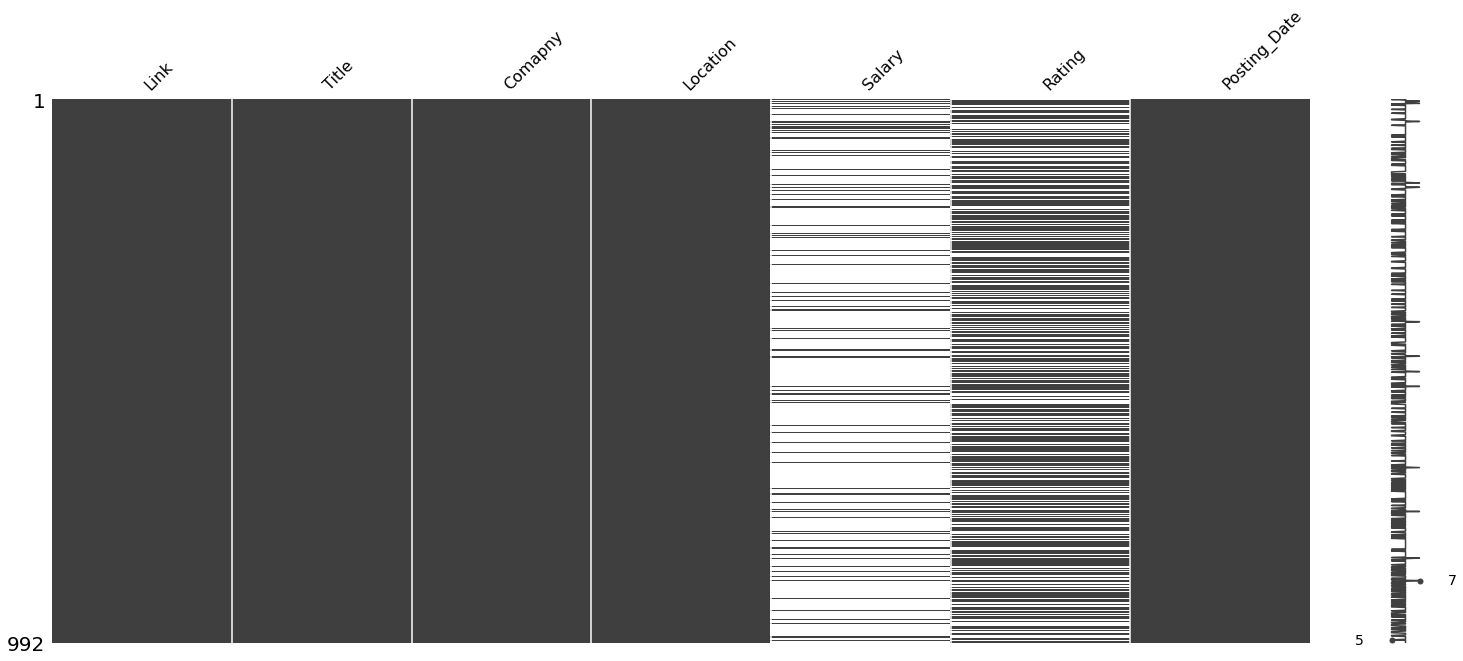

In [12]:
msno.matrix(data)

### DATA CLEANING

##### 1. Title

In [13]:
data['Title']

1                              Medical Data Analyst\nnew
2                                      Data Analyst\nnew
3                                      Data Analyst\nnew
4                           Data Analyst I, FinTech\nnew
5                                      Data Analyst\nnew
6                       Junior Data Analyst (Internship)
7                                      Data Analyst\nnew
8                                      Data Analyst\nnew
9                                      Data Analyst\nnew
10                                     Data Analyst\nnew
11                     Data Visualization - Analyst\nnew
12                                     Data Analyst\nnew
13                                 Jr. Data Analyst\nnew
14                                     Data Analyst\nnew
15                            RC HIA - Data Analyst - A2
16                                     Data Analyst\nnew
17                            Business Data Analyst\nnew
18                             

In [14]:
data['Title']=data['Title'].apply(lambda t:t.split(' '))

In [15]:
def name(x):
    if 'Business' in x:
        return 'Business Analyst'
    if 'Research' in x or 'RESEARCH' in x:
        return 'Research Analyst'
    if 'Intelligence' in x:
        return 'Intelligence Analyst'
    if 'Product'in x:
        return 'Product Analyst'
    if 'Analytics' in x:
        return 'Data Analytics'
    if 'Operation' in x or 'Operations' in x:
        return 'Operations Analyst'
    if 'Visualisation' in x or 'BI' in x or 'Visualization' in x:
        return 'Data Visualization'
    if 'Quality' in x or 'QA' in x:
        return 'Quality Analyst'
    if 'Inventory' in x:
        return 'Inventory Analyst'
    if 'Finance' in x or 'Financial' in x:
        return 'Finance Analyst'
    if 'Revenue' in x:
        return 'Revenue Analyst'
    if 'Risk' in x:
        return 'Risk Analyst'
    if 'Automation' in x:
        return 'Automation Analyst'
    if 'Scheduling' in x or 'schedule' in x:
        return 'Scheduling Analyst'
    if 'Clinical' in x:
        return 'Clinical Analyst'
    if 'Sales' in x or 'sale' in x:
        return 'Sales Analyst'
    if 'Reporting' in x:
        return 'Reporting Analyst'
    if 'Support' in x:
        return 'Support Analyst'
    if 'Trade' in x:
        return 'Trade Analyst'
    if 'Market' in x:
        return 'Market Analyst'
    if 'Information' in x or 'mi' in x:
        return 'Information Analyst'
    if 'Return' in x or 'returns' in x:
        return 'Returns Analyst'
    if 'Protection' in x:
        return 'Data Protection Analyst'
    if 'Privacy' in x:
        return 'Privacy Analyst'
    if 'SEO' in x:
        return 'SEO Analyst'
    if 'Reference' in x:
        return 'Reference Data Analyst'
    if 'SCD' in x:
        return 'SCD Analyst'
    if 'Processing' in x:
        return 'Data Processing Analyst'
    if 'Consulting' in x:
        return 'Consulting Analyst'
    if 'Audit' in x:
        return 'Audit Analyst'
    if 'Project' in x:
        return 'Project Analyst'
    if 'Network' in x:
        return 'Network Analyst'
    if 'Investment' in x:
        return 'Investment Analyst'
    else:
        return 'Data Analyst'
    

In [16]:
data['Job_Title']=data['Title'].apply(name)

##### 2. Company

In [17]:
data['Company']=data['Comapny']

In [18]:
data['Company']=data['Company'].str.split(',')

In [19]:
def list_to_string(s):
    p=""
    for i in s:
        i=i.strip("[")
        i=i.strip("]")
        i=i.strip(" \'")
        p=p+' '+i
    return (p)

In [20]:
data['Company']=data['Company'].apply(list_to_string)

In [21]:
data['Company']=data['Company'].str.strip(' ')

##### 3. Location

##### 3a.  Location (State)

In [22]:
data['Location']=data['Location'].str.split(',')

In [23]:
def list_to_strings(s):
    p=""
    for i in s:
        i=i.strip("[")
        i=i.strip("]")
        i=i.strip(" \'")
        p=p+','+i
    return (p)

In [24]:
data['Location']=data['Location'].apply(list_to_strings)

In [25]:
data['Location']=data['Location'].str.strip(',')

In [26]:
data['LOCATION']=data['Location'].str.split(',,')

In [27]:
def state(st):
    l=len(st)
    if l>1:
        for i in range(0,l):
            return st[1]
    else:
        return st

In [28]:
data['State']=data['LOCATION'].apply(state)

In [29]:
def arr(a):
    s=''
    if isinstance(a,list):
        for i in range(len(a)):
            a[i]=a[i].replace(',',' ')
            a[i]=a[i].strip(' ')
            return a[i]
    else:
        a=a.split(',')
        for i in range(len(a)):
            s=s+' '+a[i]
        return s

In [30]:
data['State']=data['State'].apply(arr)

In [31]:
data['State']

1                 Remote
2              Telangana
3              Karnataka
4              Telangana
5          Uttar Pradesh
6                 Kerala
7              Telangana
8                Gujarat
9                 Mumbai
10             Karnataka
11             Telangana
12                Kerala
13        Madhya Pradesh
14                Kerala
15             Karnataka
16             Karnataka
17        Andhra Pradesh
18               Gujarat
19             Karnataka
20           Maharashtra
21             Karnataka
22                 Delhi
23           Maharashtra
24                 India
25     Jammu and Kashmir
26                 Delhi
27             Karnataka
28           Maharashtra
29               Gujarat
30           Maharashtra
31           Maharashtra
32             Karnataka
33                 India
34             Karnataka
35                 Delhi
36             Karnataka
37           West Bengal
38               Haryana
39                 India
40             Karnataka


In [32]:
data['State']=data.loc[:,('State')].replace(' Bengaluru','Karnataka')
data['State']=data.loc[:,('State')].replace(' Chennai','Tamil Nadu')
data['State']=data.loc[:,('State')].replace([' Pune',' Navi Mumbai','Mumbai'],'Maharashtra')
data['State']=data.loc[:,('State')].replace(' Hyderabad','Telangana')

In [33]:
data['State']=data['State'].str.strip()

##### 3b. Location (City)

In [34]:
def loc(lo):
    l=len(lo)
    if l>1:
        for i in range(0,l):
            return lo[0]
    else:
        return 'India'

In [35]:
data['Location']=data['LOCATION'].apply(loc)

In [36]:
def arr1(ar):
    s=''
    ar=ar.split(',')
    for i in range(len(ar)):
        s=s+' '+ar[i]
    return s

In [37]:
data['Location']=data['Location'].apply(arr1)

##### 4. Salary

In [38]:
threshold=len(data)*0.1  # Taking 10% of the total rows as threshold to check if any column consists of null values less than the theshold no. of rows
threshold

99.2

In [39]:
data.dropna(thresh=threshold,axis=1,inplace=True)

In [40]:
data['Salary']=data['Salary'].str.split('\'')

In [41]:
def list_to_string1(s):
    p=""
    if isinstance(s,list):
        for i in s:
            i=i.strip("[")
            i=i.strip("]")
            i=i.strip(" \'")
            i=i.strip(", ")
            p=p+' '+i
        return (p)
    else:
        return 'NaN'

In [42]:
data['Salary']=data['Salary'].apply(list_to_string1)

In [43]:
data['Salary']=data['Salary'].str.strip(' ')
data['Salary']=data['Salary'].str.split(" ")

In [44]:
def list_to_string2(s):
    p=""
    for i in range(len(s)):
        s[i]=s[i].strip(" ")
        s[i]=s[i].replace("-","")
        s[i]=s[i].replace("a","")
        s[i]=s[i].replace("n","")
        s[i]=s[i].replace("moth"," ")
        s[i]=s[i].replace("hour","")
        s[i]=s[i].replace('yer',"")
        s[i]=s[i].replace('₹','')
        s[i]=s[i].replace(',','')
        print(s[i])
        p=p+' '+s[i]
    return (p)

In [45]:
data['Salary']=data['Salary'].apply(list_to_string2)

13000



15000



 
NN
NN
NN
20000



25000



 
15000



20000



 
NN
8086



15000



 
25000



33000



 
NN
NN
NN
NN
40000



70000



 
NN
NN
NN
20000



30000



 
NN
NN
NN
NN
NN
NN
NN
13000



18000



 
NN
NN
11396



 
NN
NN
NN
10000



 
NN
20000



35000



 
NN
8000



 
NN
NN
NN
NN
30000



45000



 
20000



25000



 
NN
NN
300000



800000




250000



251000




NN
NN
25000



 
45000



50000



 
400000



550000




1200000




40000



200000



 
NN
NN
10000



 
300000



400000




200000



500000




NN
NN
10000



 
NN
30000



35000



 
NN
300000



800000




NN
NN
NN
NN
40000



80769



 
NN
800000



1200000




NN
NN
NN
NN
NN
NN
NN
NN
NN
NN
20000



50000



 
NN
20000



42957



 
NN
72000



96000




NN
10000



20000



 
NN
NN
NN
15000



20000



 
NN
NN
NN
25000



 
NN
NN
NN
NN
250000



450000




12000



 
NN
NN
NN
NN
NN
NN
NN
NN
NN
NN
NN
NN
NN
NN
8610



40103



 
NN
NN
NN
NN
NN
NN
NN
NN
NN
15000



20000



 
NN
NN
250000



350000



In [46]:
data['Salary']=data['Salary'].str.strip(" ")
data['Salary']=data['Salary'].str.split(" ")

In [47]:
def mn(m):
    l=len(m)
    if l>1:
        for i in range (0,l):
            m[i]=m[i].strip(' ')
            #pd.to_numeric(m[0],downcast='integer') 
            #pd.to_numeric(m[4],downcast='integer') 
            mean_=(int(m[0])+int(m[4]))/2
            return mean_
            
    elif m!=str('NN'):
        for i in range (0,l):
            m[i]=m[i].strip(' ')
            mean_=m[0]
            return mean_
    else:
        return 'NaN'

In [48]:
data['Salary']=data['Salary'].apply(mn)

In [49]:
data['Salary']=pd.to_numeric(data['Salary'],errors='coerce')

In [50]:
def chg(c):
    if c<1000:
        return c*8*30*12
    if c>1000 and c<100000:
        return c*12
    if c>100000:
        return c
    else:
        return 'NaN'

In [51]:
data['Salary']=data['Salary'].apply(chg)

In [52]:
data['Salary']=pd.to_numeric(data['Salary'],errors='coerce')

<AxesSubplot:>

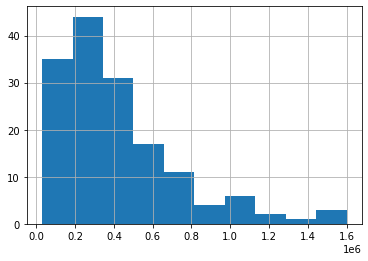

In [53]:
data['Salary'].hist()

In [54]:
def inpute_mean(series):
    return series.fillna(series.mean())

In [55]:
data['Salary']=data['Salary'].transform(inpute_mean)

In [56]:
data['Salary']

1      1.680000e+05
2      4.218442e+05
3      4.218442e+05
4      4.218442e+05
5      2.700000e+05
6      2.100000e+05
7      4.218442e+05
8      1.385160e+05
9      3.480000e+05
10     4.218442e+05
11     4.218442e+05
12     4.218442e+05
13     4.218442e+05
14     6.600000e+05
15     4.218442e+05
16     4.218442e+05
17     4.218442e+05
18     3.000000e+05
19     4.218442e+05
20     4.218442e+05
21     4.218442e+05
22     4.218442e+05
23     4.218442e+05
24     4.218442e+05
25     4.218442e+05
26     1.860000e+05
27     4.218442e+05
28     4.218442e+05
29     1.367520e+05
30     4.218442e+05
31     4.218442e+05
32     4.218442e+05
33     1.200000e+05
34     4.218442e+05
35     3.300000e+05
36     4.218442e+05
37     9.600000e+04
38     4.218442e+05
39     4.218442e+05
40     4.218442e+05
41     4.218442e+05
42     4.500000e+05
43     2.700000e+05
44     4.218442e+05
45     4.218442e+05
46     5.500000e+05
47     2.505000e+05
48     4.218442e+05
49     4.218442e+05
50     3.000000e+05


In [57]:
data['Salary']=data['Salary'].apply(lambda x:int(x))

In [58]:
data['Salary(p.a)']=data['Salary']

##### 5. Ratings

In [59]:
data['Rating']=data['Rating'].str.split("''")

In [60]:
def list_to_string2(s):
    p=""
    if isinstance(s,list):
        for i in s:
            i=i.strip("[")
            i=i.strip("]")
            i=i.strip(" \'")
            p=p+i
        return (p)

In [61]:
data['Rating']=data['Rating'].apply(list_to_string2)

In [62]:
data['Rating']=data['Rating'].str.strip(' ')

In [63]:
data['Rating']

1      None
2      None
3       3.5
4       3.7
5       3.4
6      None
7       3.4
8      None
9       2.0
10     None
11      4.0
12     None
13      3.5
14     None
15      4.0
16      4.4
17      4.0
18     None
19      3.8
20     None
21      3.6
22      4.4
23      2.7
24      4.2
25      4.2
26     None
27     None
28      3.9
29     None
30      4.0
31      4.0
32      3.6
33     None
34      3.8
35     None
36      3.7
37     None
38     None
39     None
40      4.0
41      4.0
42      4.7
43     None
44      3.4
45      3.6
46     None
47     None
48      3.7
49     None
50     None
51     None
52     None
53     None
54     None
55      4.0
56      3.7
57     None
58     None
59     None
60      4.0
61      3.3
62     None
63      4.1
64     None
65      3.8
66     None
67     None
68      4.1
69      4.0
70     None
71     None
72      4.2
73     None
74      3.8
75      4.1
76      3.7
77      4.1
78      2.7
79     None
80      3.5
81      3.5
82      3.7
83      3.7
84  

In [64]:
data['Rating']=pd.to_numeric(data['Rating'],errors='coerce')

<AxesSubplot:>

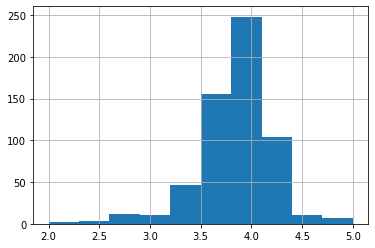

In [65]:
data['Rating'].hist()

Since the plot is not skewed and is symmetrical so we can either us the mean or the median to fill the null values

In [66]:
data['Rating']=data['Rating'].transform(inpute_mean)

In [67]:
data['Rating']

1      3.796661
2      3.796661
3      3.500000
4      3.700000
5      3.400000
6      3.796661
7      3.400000
8      3.796661
9      2.000000
10     3.796661
11     4.000000
12     3.796661
13     3.500000
14     3.796661
15     4.000000
16     4.400000
17     4.000000
18     3.796661
19     3.800000
20     3.796661
21     3.600000
22     4.400000
23     2.700000
24     4.200000
25     4.200000
26     3.796661
27     3.796661
28     3.900000
29     3.796661
30     4.000000
31     4.000000
32     3.600000
33     3.796661
34     3.800000
35     3.796661
36     3.700000
37     3.796661
38     3.796661
39     3.796661
40     4.000000
41     4.000000
42     4.700000
43     3.796661
44     3.400000
45     3.600000
46     3.796661
47     3.796661
48     3.700000
49     3.796661
50     3.796661
51     3.796661
52     3.796661
53     3.796661
54     3.796661
55     4.000000
56     3.700000
57     3.796661
58     3.796661
59     3.796661
60     4.000000
61     3.300000
62     3.796661
63     4

In [68]:
data['Rating']=data['Rating'].apply(lambda x:float(x))

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [69]:
data['Rating']=data['Rating'].round(1)

In [70]:
data.drop(['Title','Comapny','LOCATION'],axis=1,inplace=True)

In [71]:
data.columns

Index(['Link', 'Location', 'Salary', 'Rating', 'Posting_Date', 'Job_Title',
       'Company', 'State', 'Salary(p.a)'],
      dtype='object')

In [72]:
cols=['Company','Link','Job_Title','Salary(p.a)','Location','State','Rating','Posting_Date']

In [73]:
data=data[cols]

In [74]:
data

,Company,Link,Job_Title,Salary(p.a),Location,State,Rating,Posting_Date
1,ARDEM Data Services Private Limited,https://in.indeed.com//company/ARDEM-Data-Serv...,Data Analyst,168000,India,Remote,3.8,Just posted
2,Cognizant - HQ,https://in.indeed.com//rc/clk?jk=2f484ec7f01ca...,Data Analyst,421844,Hyderabad,Telangana,3.8,2 days ago
3,Clarivate Analytics,https://in.indeed.com//rc/clk?jk=da3d5ba105be4...,Data Analyst,421844,Bengaluru,Karnataka,3.5,Today
4,Uber,https://in.indeed.com//rc/clk?jk=cb6a718607430...,Data Analyst,421844,Hyderabad,Telangana,3.7,6 days ago
5,Shriv ComMedia Solutions Pvt Ltd,https://in.indeed.com//company/Shriv-ComMedia-...,Data Analyst,270000,Noida,Uttar Pradesh,3.4,Just posted
6,Impress AI,https://in.indeed.com//company/Impress-AI/jobs...,Data Analyst,210000,Kochi,Kerala,3.8,11 days ago
7,IBI Group,https://in.indeed.com//rc/clk?jk=194d36ffdc29d...,Data Analyst,421844,Hyderabad,Telangana,3.4,Today
8,Key Concepts Tech LLP,https://in.indeed.com//company/Key-Concepts-Te...,Data Analyst,138516,Surat,Gujarat,3.8,Just posted
9,Ruloans,https://in.indeed.com//company/Ruloans/jobs/Da...,Data Analyst,348000,Andheri,Mumbai,2.0,Just posted
10,Dailyhunt,https://in.indeed.com//rc/clk?jk=159cdd46c0713...,Data Analyst,421844,Bengaluru,Karnataka,3.8,1 day ago


#### DATA VISUALISATION

1.Various Posts that are available

Text(0.5, 1.0, 'JOB TITLE v/s NUMBER OF OPENINGS')

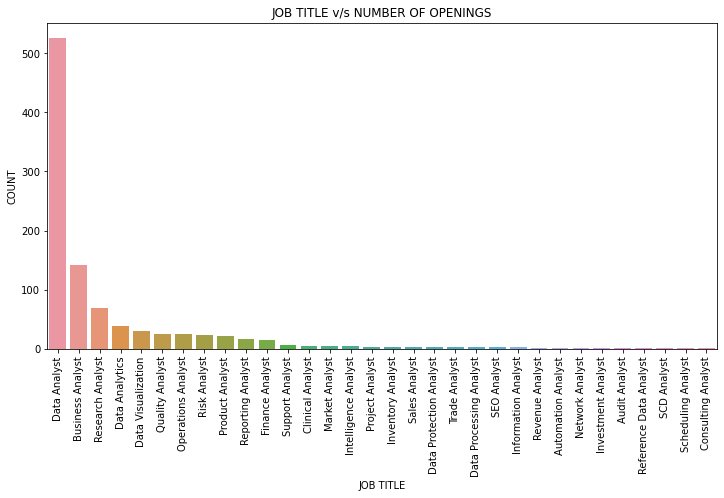

In [75]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(data['Job_Title'],order=data['Job_Title'].value_counts().index)
plt.xlabel('JOB TITLE')
plt.ylabel('COUNT')
plt.title('JOB TITLE v/s NUMBER OF OPENINGS')

2.Which state has the maximum openings

Text(0.5, 1.0, 'STATE v/s NUMBER OF OPENINGS')

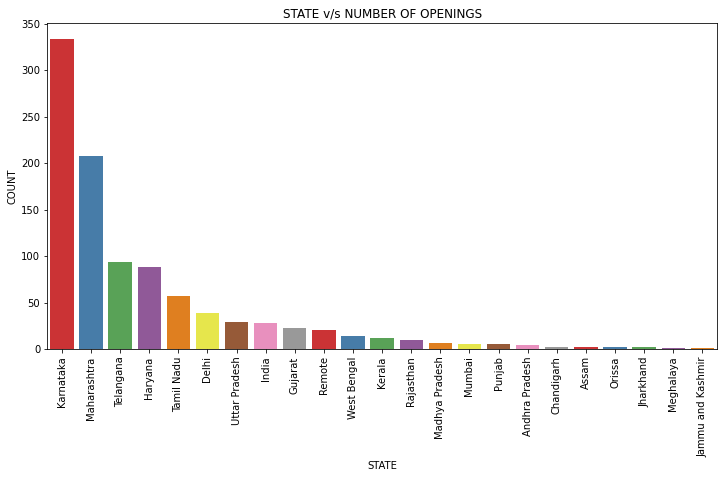

In [76]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(data['State'],order=data['State'].value_counts().index,palette='Set1')
plt.xlabel('STATE')
plt.ylabel('COUNT')
plt.title('STATE v/s NUMBER OF OPENINGS')

3.Which are the high paying posts available

Text(0.5, 1.0, 'JOB TITLE v/s SALARY (P.A)')

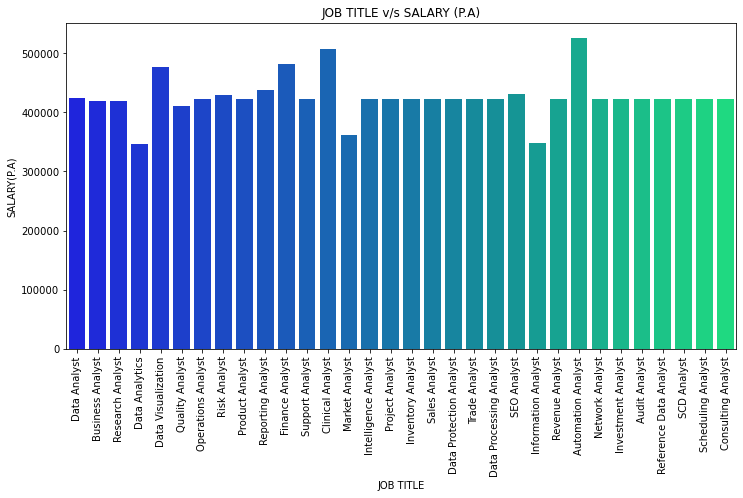

In [77]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(y=data['Salary(p.a)'],x=data['Job_Title'],ci=None,palette='winter',order=data['Job_Title'].value_counts().index)
plt.xlabel('JOB TITLE')
plt.ylabel('SALARY(P.A)')
plt.title('JOB TITLE v/s SALARY (P.A)')

4.Which states offer high salary to Data Analysts

Text(0.5, 1.0, 'STATE v/s SALARY(P.A)')

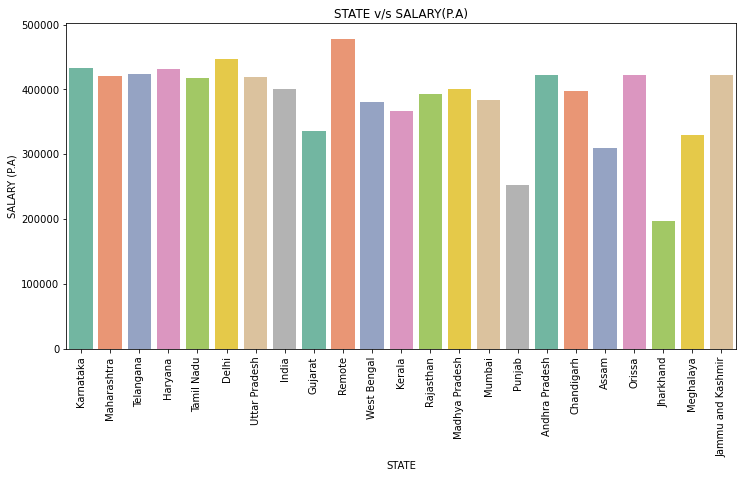

In [78]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(y=data['Salary(p.a)'],x=data['State'],ci=None,palette='Set2',order=data['State'].value_counts().index)
plt.xlabel('STATE')
plt.ylabel('SALARY (P.A)')
plt.title('STATE v/s SALARY(P.A)')

##### NOTE: 
The above dataset was taken during the COVID-19 situation which is why most of the openings were 'Remote' or Work From Home. Furthermore, we can alse see in the above plot that, 'Remote' is showing us the maximum salary out of all the states, this is because most of the companies did not wish of provide the exact Location, considering the ongoing situations.

5.Which Companies have the maximum openings (Top 20)

In [79]:
ra=data['Company'].value_counts().head(20)
ra

Deloitte                      16
JPMorgan Chase Bank  N.A.     15
Barclays                      14
Citi                          14
Standard Chartered             9
Luxoft                         8
Amex                           8
Deutsche Bank                  8
PwC                            7
Dun & Bradstreet               7
Myntra.com                     7
Udaan                          7
Flipkart                       6
Evolent Health                 5
Ernst & Young                  5
Maersk                         5
Hewlett Packard Enterprise     5
Goldman Sachs                  5
Meredith Corporation           5
GO-JEK                         5
Name: Company, dtype: int64

Text(0.5, 1.0, 'COMPANY v/s NUMBER OF OPENINGS')

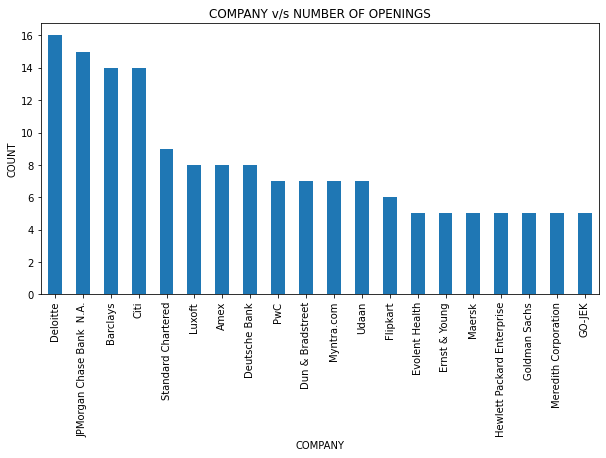

In [80]:
plt.figure(figsize=(10,5))
ra.plot(kind='bar')
plt.xlabel('COMPANY')
plt.ylabel('COUNT')
plt.title('COMPANY v/s NUMBER OF OPENINGS')

6.Top 50 Highly rated Companies which have openings for Data Analyst posts.

In [81]:
grp=data.groupby('Company')
x=grp['Rating'].agg(np.mean)

In [82]:
x1=x.sort_values(ascending=False).head(50)

Text(0.5, 1.0, 'COMPANY v/s RATING')

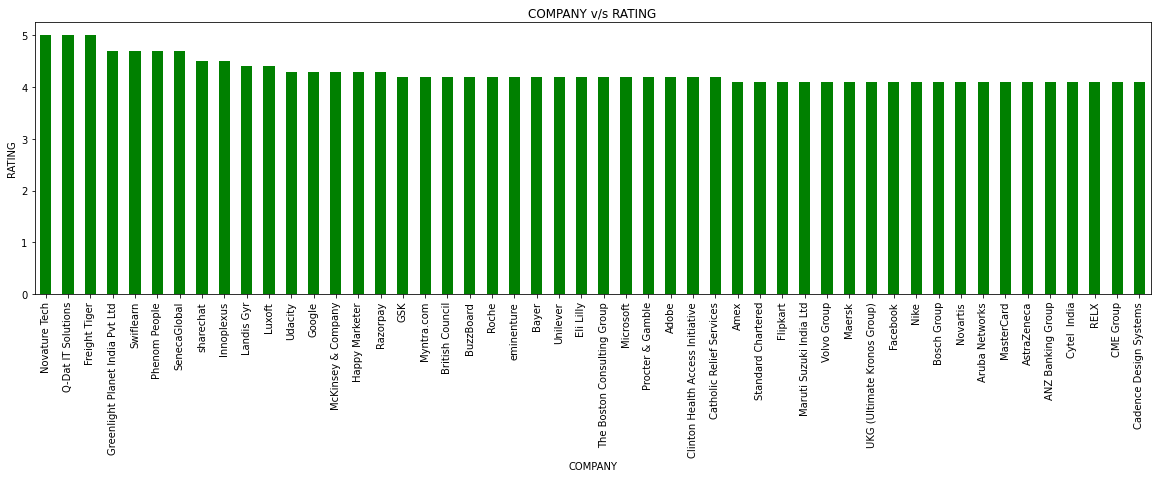

In [83]:
plt.figure(figsize=(20,5))
x1.plot.bar(color='g')
plt.xlabel('COMPANY')
plt.ylabel('RATING')
plt.title('COMPANY v/s RATING')